In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [3]:
# create a DataFrame containing both the features and classes.
df = X.join(pd.Series(y, name='class'))

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [6]:
class_feature_means = pd.DataFrame(columns=wine.target_names)
for c, rows in df.groupby('class'):
    class_feature_means[c] = rows.mean()
class_feature_means

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


### Compute the within class and between class scatter matrices

In [14]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'],axis=1)
    
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s

In [29]:
within_class_scatter_matrix

array([[ 2.9229e+02,  6.2033e+01,  1.4718e+01,  1.9552e+02, -6.7906e+02,
         3.0044e+01,  3.9477e+00,  1.1577e+00,  7.3445e+01,  4.5908e+02,
        -5.8483e+00,  4.0079e+01, -1.3837e+04],
       [ 6.2033e+01,  1.5010e+03,  1.4554e+01,  5.0418e+02, -3.8950e+03,
        -7.4734e+01, -1.3327e+02,  3.6566e+01, -9.6153e+01, -3.2497e+02,
         9.7079e+00,  2.0324e+01, -9.8806e+03],
       [ 1.4718e+01,  1.4554e+01,  3.8050e+01,  3.5658e+02,  4.2941e+02,
         2.8423e+01,  1.1072e+01,  9.1072e-01,  8.6140e+00,  4.7579e+01,
         4.5713e+00,  1.5737e+01, -5.4286e+03],
       [ 1.9552e+02,  5.0418e+02,  3.5658e+02,  6.1133e+03,  4.1436e+03,
         2.5940e+02,  1.5286e+02, -2.7083e-01,  1.9003e+02,  1.0519e+03,
        -5.0408e+00,  5.1747e+01, -5.5516e+04],
       [-6.7906e+02, -3.8950e+03,  4.2941e+02,  4.1436e+03,  1.3430e+05,
        -3.2224e+02,  2.7906e+03, -1.0904e+03,  5.7724e+02,  2.9508e+03,
        -3.8039e+01, -1.0529e+03,  5.5890e+03],
       [ 3.0044e+01, -7.4734e+

In [15]:
feature_means = df.mean()
between_class_scatter_matrix = np.zeros((13,13))
for c in class_feature_means:    
    n = len(df.loc[df['class'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(13,1), feature_means.values.reshape(13,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

In [30]:
between_class_scatter_matrix

array([[ 7.0795e+01,  1.3723e+01,  1.0668e+01, -1.3186e+02,  5.5262e+02,
         2.1257e+01,  3.0029e+01, -2.6178e+00,  8.3076e+00,  1.3888e+02,
        -2.4933e+00,  8.2530e+00,  2.6987e+04],
       [ 1.3723e+01,  6.5578e+01,  5.1556e+00,  1.1793e+02,  1.5062e+00,
        -3.8943e+01, -7.9531e+01,  5.4292e+00, -2.7994e+01,  1.5941e+02,
        -1.7995e+01, -5.9906e+01, -6.1709e+03],
       [ 1.0668e+01,  5.1556e+00,  1.7592e+00, -1.2829e+01,  7.8095e+01,
         1.0900e+00,  3.3671e-01, -1.0316e-01, -2.0087e-01,  2.7430e+01,
        -1.2351e+00, -1.7747e+00,  3.5073e+03],
       [-1.3186e+02,  1.1793e+02, -1.2829e+01,  5.7283e+02, -1.2702e+03,
        -1.3780e+02, -2.5058e+02,  1.8415e+01, -8.2987e+01,  4.3483e+01,
        -3.5293e+01, -1.5564e+02, -7.6268e+04],
       [ 5.5262e+02,  1.5062e+00,  7.8095e+01, -1.2702e+03,  4.4910e+03,
         2.3822e+02,  3.7768e+02, -3.0399e+01,  1.1454e+02,  8.6166e+02,
         9.9330e+00,  1.6767e+02,  2.2980e+05],
       [ 2.1257e+01, -3.8943e+

### Compute the eigenvectors and corresponding eigenvalues for the scatter matrices

In [16]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [31]:
eigen_values

array([ 4.4409e-16+0.0000e+00j,  2.9034e+00+0.0000e+00j,
        9.8845e+00+0.0000e+00j, -2.6099e-16+3.6939e-16j,
       -2.6099e-16-3.6939e-16j, -4.9900e-16+0.0000e+00j,
        3.8407e-16+2.0685e-16j,  3.8407e-16-2.0685e-16j,
        2.5881e-16+1.8145e-16j,  2.5881e-16-1.8145e-16j,
        8.1893e-17+0.0000e+00j, -2.0356e-17+3.3398e-17j,
       -2.0356e-17-3.3398e-17j])

In [32]:
eigen_vectors

array([[-5.1663e-01+0.0000e+00j,  2.0879e-01+0.0000e+00j,
        -4.1562e-02+0.0000e+00j, -7.7688e-02-7.3030e-02j,
        -7.7688e-02+7.3030e-02j,  4.5170e-02+0.0000e+00j,
        -1.6341e-01+2.4440e-01j, -1.6341e-01-2.4440e-01j,
         2.6958e-01+1.9831e-02j,  2.6958e-01-1.9831e-02j,
        -2.9595e-01+0.0000e+00j,  1.5512e-01+1.3694e-01j,
         1.5512e-01-1.3694e-01j],
       [ 6.5020e-03+0.0000e+00j,  3.6500e-03+0.0000e+00j,
        -1.6684e-02+0.0000e+00j, -1.9099e-02+1.5779e-01j,
        -1.9099e-02-1.5779e-01j,  1.9110e-02+0.0000e+00j,
         1.0327e-01+1.5778e-01j,  1.0327e-01-1.5778e-01j,
         2.1503e-01-1.3121e-01j,  2.1503e-01+1.3121e-01j,
         9.6905e-03+0.0000e+00j, -2.0572e-02-1.2808e-02j,
        -2.0572e-02+1.2808e-02j],
       [ 3.7477e-01+0.0000e+00j,  4.5911e-01+0.0000e+00j,
        -4.4776e-03+0.0000e+00j,  2.7418e-01-1.8562e-02j,
         2.7418e-01+1.8562e-02j, -7.8043e-01+0.0000e+00j,
         1.0257e-01-3.6877e-02j,  1.0257e-01+3.6877e-02j,
    

### Sort the eigenvalues and select the top k

In [17]:
# sort the eigenvalues from highest to lowest and select the first k eigenvectors
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.884546449232978
2.903361061716055
4.989996735217528e-16
4.522860853851705e-16
4.522860853851705e-16
4.440892098500626e-16
4.362274126993647e-16
4.362274126993647e-16
3.1607984533921466e-16
3.1607984533921466e-16
8.189333581319344e-17
3.911241445201244e-17
3.911241445201244e-17


In [18]:
# expressing the values as percentage
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.7729604269322256
Eigenvector 1: 0.22703957306777445
Eigenvector 2: 3.902121383772195e-17
Eigenvector 3: 3.536826372867666e-17
Eigenvector 4: 3.536826372867666e-17
Eigenvector 5: 3.4727277271111986e-17
Eigenvector 6: 3.4112493566743885e-17
Eigenvector 7: 3.4112493566743885e-17
Eigenvector 8: 2.471708878630741e-17
Eigenvector 9: 2.471708878630741e-17
Eigenvector 10: 6.403966852518772e-18
Eigenvector 11: 3.0585468669150374e-18
Eigenvector 12: 3.0585468669150374e-18


### Create a new matrix containing eigenvectors that map to the k eigenvalues

In [19]:
#create a matrix W with the first two eigenvectors.
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

In [20]:
X_lda = np.array(X.dot(w_matrix))

In [21]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

### Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4

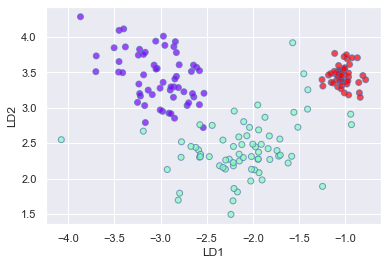

In [22]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [24]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

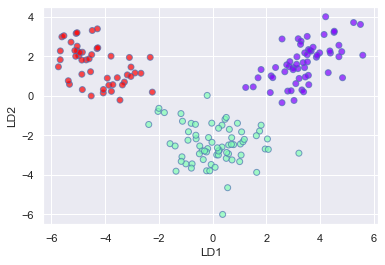

In [25]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)